In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import shapefile as shp
from shapely.geometry import Point
sns.set_style('whitegrid')

In [2]:
fp = r'/home/t-sahuja/cultural_artifacts/notebooks/india-polygon.shp'
map_df = gpd.read_file(fp) 
map_df_copy = gpd.read_file(fp)
map_df.head()

,id,st_nm,geometry
0,NaN,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,NaN,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,NaN,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,NaN,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,NaN,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


In [ ]:
map_df['st_nm']

In [3]:
results = pd.read_csv('/home/t-sahuja/cultural_artifacts/notebooks/results_plot.csv')

In [ ]:
results.columns

In [4]:
list_of_results = []
li_models = ['Llama 2', 'Falcon', 'GPT-4', 'Palm 2']
for model in li_models:
    score_data = {
        'State': results['States'],
        'Score': results[model]
    }
    list_of_results.append(pd.DataFrame(score_data))

In [ ]:
list_of_results[0]

In [ ]:
merged_llama = map_df.set_index('st_nm').join(list_of_results[0].set_index('State'))

In [ ]:
merged_llama['Score'] = merged_llama['Score'].replace(np.nan, 0)

In [ ]:
#Create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Accuracy of Llama2', fontdict={'fontsize': '20', 'fontweight' : '10'})
merged_llama.plot(column='Score',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Number of landslides"})


In [21]:
map_df['st_nm']

0     Andaman and Nicobar Islands
1               Arunachal Pradesh
2                           Assam
3                           Bihar
4                      Chandigarh
5                    Chhattisgarh
6          Dadra and Nagar Haveli
7                   Daman and Diu
8                             Goa
9                         Gujarat
10                        Haryana
11               Himachal Pradesh
12                      Jharkhand
13                      Karnataka
14                         Kerala
15                    Lakshadweep
16                 Madhya Pradesh
17                    Maharashtra
18                        Manipur
19                      Meghalaya
20                        Mizoram
21                       Nagaland
22                          Delhi
23                     Puducherry
24                         Punjab
25                      Rajasthan
26                         Sikkim
27                     Tamil Nadu
28                      Telangana
29            

In [5]:
def create_heatmap(df, map_df):
    df = df.copy()
    map_df = map_df.copy()
    states_with_data = df['State'].tolist()
    states_with_data = set(states_with_data)
    all_states = map_df['st_nm'].tolist()
    all_states = set(all_states)
    no_data_states = list(all_states - states_with_data)
    
    merged = map_df.set_index('st_nm').join(df.set_index('State'))
    merged['State'] = map_df['st_nm'].tolist()
    merged['Score'] = merged['Score'].replace(np.nan, 0)
    for state in no_data_states:
        merged.loc[merged['State'] == state, 'Score'] = -1
    merged['Score'] = merged['Score'].replace(-1, np.nan)
    return merged

In [ ]:
list_of_results[2].columns
    # merged['Score'] = merged['Score'].replace(np.nan, 0)


In [23]:
gpt_4 = create_heatmap(list_of_results[2], map_df)

In [24]:
gpt_4

,id,geometry,Score,State
st_nm,,,,
Andaman and Nicobar Islands,NaN,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",NaN,Andaman and Nicobar Islands
Arunachal Pradesh,NaN,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",NaN,Arunachal Pradesh
Assam,NaN,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",0.45,Assam
Bihar,NaN,"POLYGON ((88.11357 26.54028, 88.28006 26.37640...",0.50,Bihar
Chandigarh,NaN,"POLYGON ((76.84208 30.76124, 76.83758 30.72552...",NaN,Chandigarh
Chhattisgarh,NaN,"POLYGON ((83.94694 23.62196, 83.95594 23.62406...",0.22,Chhattisgarh
Dadra and Nagar Haveli,NaN,"POLYGON ((73.20640 20.12165, 73.20865 20.10695...",NaN,Dadra and Nagar Haveli
Daman and Diu,NaN,"POLYGON ((72.80144 20.37378, 72.84418 20.47463...",NaN,Daman and Diu
Goa,NaN,"POLYGON ((74.11982 15.65278, 74.24806 15.65698...",NaN,Goa


In [ ]:
map_df.columns

In [ ]:
states_with_data = results['States'].tolist()
states_with_data = set(states_with_data)
all_states = map_df['st_nm'].tolist()
all_states = set(all_states)
no_data_states = list(all_states - states_with_data)
print(no_data_states)

In [ ]:
gpt_4

In [ ]:
llama2, falcon, gpt4, palm2 = (
    create_heatmap("Llama2", list_of_results[0]),
    create_heatmap("Falcon", list_of_results[1]),
    create_heatmap("GPT-4", list_of_results[2]),
    create_heatmap("Palm-2", list_of_results[3]),
)

/tmp/ipykernel_524619/4089951566.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


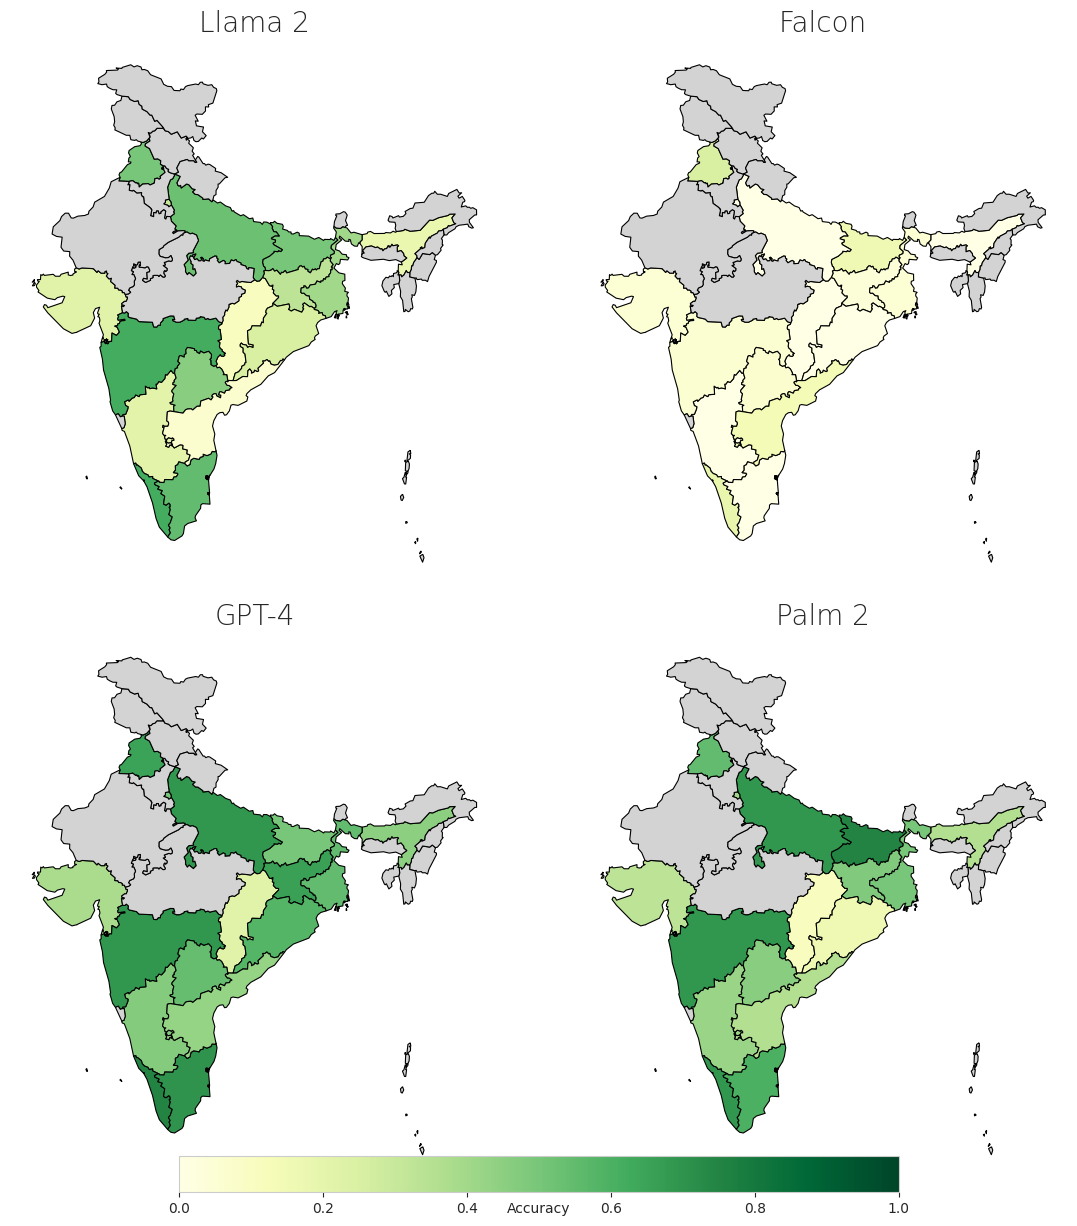

In [22]:
# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Define titles for each heatmap
titles = ["Llama 2", "Falcon", "GPT-4", "Palm 2"]

df1, df2, df3, df4 = (
    list_of_results[0],
    list_of_results[1],
    list_of_results[2],
    list_of_results[3],
)

# Iterate through dataframes and titles
for i, (df, title) in enumerate(zip([df1, df2, df3, df4], titles)):
    # Calculate the subplot position
    row = i // 2
    col = i % 2

    # Call your create_heatmap function for each dataframe
    merged = create_heatmap(df, map_df)  # Assuming map_df is defined somewhere

    # Plot the heatmap in the appropriate subplot using Seaborn
    ax = axs[row, col]
    ax.axis("off")
    ax.set_title(title, fontdict={"fontsize": "20", "fontweight": "10"})
    merged.plot(
        column="Score",
        cmap="YlGn",
        linewidth=0.8,
        ax=ax,
        edgecolor="0",
        vmin=0,
        vmax=1,
        missing_kwds={
            'color': 'lightgray',
            'label': 'Missing values',
        }
    )
# ax.annotate('The greyed out area denotes that no data was collected/available for those states',
#             xy=(6, 6), xycoords='figure pixels')
# Create a common colorbar
cax = fig.add_axes([0.2, 0.002, 0.6, 0.03])  # Adjust the position as needed
sm = plt.cm.ScalarMappable(cmap="YlGn", norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
cbar.set_label("Accuracy", labelpad=-10)  # Replace with your legend label
# cbar.ax.set_xlabel("Accuracy", labelpad=-30) 
# ax.annotate('The greyed out area denotes that no data was collected/available for those states',
#             xy=(6, 6), xycoords='figure pixels')
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.savefig('heatmaps_india2.pdf', format='pdf', bbox_inches='tight')
plt.show()


[([], []), ([], []), ([], []), ([], [])]


<Axes: >

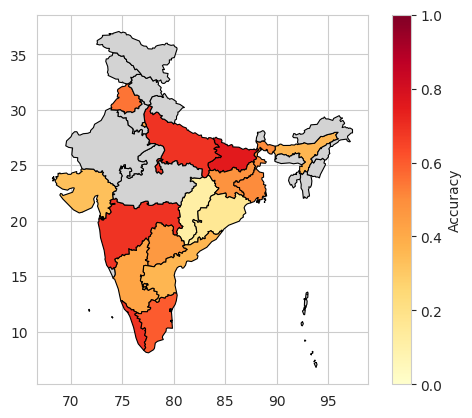

In [33]:
# fig, axs = plt.subplots(1, figsize=(12, 12))
fig, ax = plt.subplots()
merged.plot(
        column="Score",
        cmap="YlOrRd",
        linewidth=0.8,
        figsize=(15,10),
        ax=ax,
        edgecolor="0",
        legend=True,
        legend_kwds={"label": "Accuracy"},
        vmin=0,
        vmax=1,
         missing_kwds = {
            'color': 'lightgray',
            'label': 'Missing values'
            # 'edgecolor': 'lightgray',
            # 'hatch': '///'
        }
        
    )
# plt.tight_layout()

# Show the plot
# plt.show()

# for idx, row_data in examples_to_denote.iterrows():
#         state_geom = merged.loc[idx, 'geometry']
#         if state_geom.geom_type == 'Polygon':
#             print(*state_geom.exterior.xy, "poly")
#             ax.plot(*state_geom.exterior.xy[0], color='gray', linestyle='--', linewidth=1)
#         elif state_geom.geom_type == 'MultiPolygon':
#             for polygon in state_geom.geoms:
#                 print(*polygon.exterior.xy, "check2")
#                 ax.plot(*polygon.exterior.xy[0], color='gray', linestyle='--', linewidth=1)

In [ ]:
type(merged)